# Transcript correlation

In [ ]:
import pandas as pd

In [ ]:
dir_notebook = '/media/volume/volume_spatial/hugo/notebook'

# # ### circa2_
samples = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21']
samples_ids = ['circa2_ZT01','circa2_ZT05','circa2_ZT09','circa2_ZT13','circa2_ZT17','circa2_ZT21',]
name_dir = 'circa2'

# samples = ["S1_Region1", "S1_Region2", "S2_Region1","S2_Region2"]
# samples_ids = ["S1-Region1", "S1-Region2", "S2-Region1","S2-Region2"]
# name_dir = "last_test"

# dir_ = {'circa2-ZT01' : "/media/volume/volume_spatial/hugo/data",
#         'circa2-ZT05' : "/media/volume/volume_spatial/hugo/data",
#         'circa2-ZT09' : "/media/volume/volume_spatial/hugo/data",
#         'circa2-ZT13' : "/media/volume/volume_spatial/hugo/data",
#         'circa2-ZT17' : "/media/volume/volume_spatial/hugo/data",
#         'circa2-ZT21' : "/media/volume/volume_spatial/hugo/data",
#         "S1_Region1" : '/media/volume/volume_spatial/hugo/data',
#         "S1_Region2" : '/media/volume/volume_spatial/hugo/data',
#         "S2_Region1" : '/media/volume/volume_spatial/hugo/data',
#         "S2_Region2" : '/media/volume/volume_spatial/hugo/data',
#         "3159-1" : '/media/volume/volume_spatial/hugo/data',
#         "3160-1" : '/media/volume/volume_spatial/hugo/data'
#        }

dir_ = "/media/volume/volume_spatial/hugo/data"

In [ ]:
import pandas as pd
# samples = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21']
# samples_ids = ['circa2_ZT01','circa2_ZT05','circa2_ZT09','circa2_ZT13','circa2_ZT17','circa2_ZT21',]

samples = ['3159-2', "3160-1", "3159-1", "3161-1",]
samples_ids = ['3159-2', "3160-1", "3159-1", "3161-1",]
dir_ = 'D:\\Xenium'

# samples_ids = ['circa4-Salk-ZT01','circa4-Salk-ZT05','circa4-Salk-ZT09',
#                'circa4-Salk-ZT13','circa4-Salk-ZT17','circa4-Salk-ZT21',
#                'circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09',
#                'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',]

# samples = ['circa4-Salk-ZT01','circa4-Salk-ZT05','circa4-Salk-ZT09',
#                'circa4-Salk-ZT13','circa4-Salk-ZT17','circa4-Salk-ZT21',
#                'circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09',
#                'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',]

### create a scanpy objects for each sample and create a unique cell name for each cell
def top_genes_():
    list_ = []
    for sample, sample_id in zip(samples, samples_ids):
        transcript_count = pd.read_parquet(f'{dir_}/{sample}/transcripts.parquet')

        transcript_count = transcript_count[(~transcript_count['feature_name'].str.contains('_')) & (transcript_count['qv']>=20)]
        transcript_count = transcript_count['feature_name'].value_counts()
        transcript_count = transcript_count.sort_index()
        list_.append(transcript_count)

    return list_

def top_genes_assigned():
    list_ = []
    for sample, sample_id in zip(samples, samples_ids):
        transcript_count = pd.read_parquet(f'{dir_}/{sample}/transcripts.parquet')

        transcript_count = transcript_count[(~transcript_count['feature_name'].str.contains('_')) & (transcript_count['qv']>=20) & (transcript_count[''])]
        transcript_count = transcript_count['feature_name'].value_counts()
        transcript_count = transcript_count.sort_index()
        list_.append(transcript_count)

    return list_
        

In [ ]:
test = top_genes_()

In [ ]:
from scipy import stats

ref = 0

def spearcor_(test_list):
    nb_sample = len(test_list)
    dict_list = {}
    for n in range(0,nb_sample):
        stat_ = stats.pearsonr(x=test_list[ref].sort_index(), y = test_list[n].sort_index())
        dict_temp = {samples[n]:round(stat_[0],3)}
        dict_list.update(dict_temp)

    return dict_list

In [ ]:
dict_list = spearcor_(test)

In [ ]:
dict_list

In [ ]:
import matplotlib.pyplot as plt
def plot_coor(dict_list, save_fig = False):
    x = list(dict_list.keys())
    y = list(dict_list.values())
    low = min(y) - 0.05
    high = max(y) + 0.05
    plt.bar(x,y, color = "lightblue", edgecolor = 'black')
    plt.ylim(low,high)
    plt.hlines(y=1, xmin=-0.5,xmax=12.5, linestyles='dashed', colors = 'black')
    plt.title(f'Spearman correlation of genes order compared to {samples_ids[ref]}')
    plt.tick_params(axis = "x", rotation=90, pad = -90, direction = "in")
    if fig_save:
        plt.savefig(f'plot/spearman_correlation_ref_{samples_ids[ref]}.svg')

In [ ]:
plot_coor(dict_list)

In [ ]:
transcript_count.shape

In [ ]:
transcript_count = transcript_count[(~transcript_count['feature_name'].str.contains('_')) & (transcript_count['qv']>=20)]

In [ ]:
transcript_count.shape

In [ ]:
transcript_count_values = transcript_count['feature_name'].value_counts()

In [ ]:
transcript_count_values_top300 = transcript_count_values[0:300].index

In [ ]:
globals()["transcript_"+str(sample_ids)] = transcript_count_values_top300

In [ ]:
transcript_circa2_ZT01

### Matrix

In [ ]:
samples = samples_ids = ['circa2-ZT01','circa2-ZT05','circa2-ZT09',
                         'circa2-ZT13','circa2-ZT17','circa2-ZT21',
                         'circa4-Salk-ZT01','circa4-Salk-ZT05','circa4-Salk-ZT09',
                         'circa4-Salk-ZT13','circa4-Salk-ZT17','circa4-Salk-ZT21',
                         'circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09',
                         'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',]


name_dir = 'circa2'
dir_ = "/media/volume/volume_spatial/hugo/data"

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

d = {}

for sample in samples:
    d_temp = {sample : np.zeros(len(samples))}
    d.update(d_temp)

df = pd.DataFrame(d, index = samples)

In [ ]:
def top_genes_():
    list_ = []
    for sample, sample_id in zip(samples, samples_ids):
        transcript_count = pd.read_parquet(f'{dir_}/{sample}/transcripts.parquet')

        transcript_count = transcript_count[(~transcript_count['feature_name'].str.contains('_')) & (transcript_count['qv']>=20)]
        transcript_count = transcript_count['feature_name'].value_counts()
        transcript_count = transcript_count.sort_index()
        list_.append(transcript_count)

    return list_


def spearcor_(test_list):
    nb_sample = len(test_list)
    dict_list = {}
    for n in range(0,nb_sample):
        stat_ = stats.pearsonr(x=test_list[ref].sort_index(), y = test_list[n].sort_index())
        dict_temp = {samples[n]:round(stat_[0],3)}
        dict_list.update(dict_temp)
    return dict_list

In [ ]:
test_list = top_genes_()

In [ ]:
test_list[0]

In [ ]:
a=0
for sample_ref in samples:
   b=0
   for sample_test in samples:
     if len(test_list[a]) == len(test_list[b]):
      stat_ = stats.pearsonr(x=test_list[a].sort_index(), y = test_list[b].sort_index())
     else:
      CTRL_genes = set(test_list[a].index)
      TEST_genes = set(test_list[b].index)
      common_genes_list = list(CTRL_genes.intersection(TEST_genes))
      temp_CTRL = []
      temp_TEST = []
      for gene in common_genes_list:
          temp_CTRL.append(test_list[a][gene])
          temp_TEST.append(test_list[b][gene])
      stat_ = stats.pearsonr(x=temp_CTRL, y = temp_TEST)
    
     df[sample_ref][sample_test] = round(stat_[0],3)
     b+=1
     
   a+=1

        

In [ ]:
df.min().min()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


matrix = np.triu(df)
np.fill_diagonal(matrix, False)

plt.figure(figsize=(8,8))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".2f", cbar = False, mask = matrix)
plt.savefig('Gallery/pearson_correlation_matrix_circa.svg')


### Scatter plot and correlation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
dir_ = '../data'
# dir_ = 'D:\\Xenium'

In [ ]:
sample_CTRL = "circa4-IGM-ZT17"
transcript_count_CTRL = pd.read_parquet(f'{dir_}/{sample_CTRL}/transcripts.parquet')
transcript_count_CTRL = transcript_count_CTRL[(~transcript_count_CTRL['feature_name'].str.contains('_')) & (transcript_count_CTRL['qv']>=20)]

In [ ]:
sample_TEST = "circa4-Salk-ZT17"
transcript_count_TEST = pd.read_parquet(f'{dir_}/{sample_TEST}/transcripts.parquet')
transcript_count_TEST = transcript_count_TEST[(~transcript_count_TEST['feature_name'].str.contains('_')) & (transcript_count_TEST['qv']>=20)]

In [ ]:
transcript_count_CTRL_all = transcript_count_CTRL['feature_name'].value_counts()
transcript_count_CTRL_all = transcript_count_CTRL_all.sort_index()
transcript_count_TEST_all = transcript_count_TEST['feature_name'].value_counts()
transcript_count_TEST_all = transcript_count_TEST_all.sort_index()

In [ ]:
d = {'CTRL' : transcript_count_CTRL_all.values, 'TEST' : transcript_count_TEST_all.values}

In [ ]:
type(transcript_count_CTRL_all)

In [ ]:
df = pd.DataFrame(data = d, index = transcript_count_TEST_all.index)
df['Percent'] = df['CTRL'] / df['TEST']

In [ ]:
df.sort_values(by='TEST').tail(10),df.sort_values(by='TEST').head(10)

In [ ]:
plt.scatter(x=range(4000), y = df['Percent'].sort_values())
plt.yscale('log')
# plt.xscale('log')
plt.hlines(y=1, xmin=0, xmax=5006)


In [ ]:
from scipy import stats

stat_ = stats.pearsonr(x=transcript_count_CTRL_all, y = transcript_count_TEST_all)

import matplotlib.pyplot as plt

max_x = max(transcript_count_CTRL_all)
max_y = max(transcript_count_TEST_all)

plt.scatter(x=transcript_count_CTRL_all, y = transcript_count_TEST_all, s=50, alpha = 0.50, color = 'grey', edgecolors='black')
plt.xlabel(sample_CTRL)
plt.ylabel(sample_TEST)
plt.plot([0, max_x], [0, max_y], linestyle = 'dashed', color = 'black', alpha = 0.24)
plt.title(f'Spearson correlation : {round(stat_[0],3)}')
# plt.savefig(f'/media/volume/volume_spatial/hugo/notebook/plot/correlation_scatter/{sample_CTRL}_v_{sample_TEST}_scatter_correlation.svg')

### Non-gene codewords

In [ ]:
import pandas as pd
samples = ['circa2-ZT01', 'circa2-ZT09','circa4-Salk-ZT01','circa4-IGM-ZT01', 'circa4-Salk-ZT05','circa4-IGM-ZT05', 'circa4-Salk-ZT09','circa4-IGM-ZT09',
           'circa4-Salk-ZT13','circa4-IGM-ZT13', 'circa4-Salk-ZT17','circa4-IGM-ZT17', 'circa4-Salk-ZT21','circa4-IGM-ZT21']

dir_ = '/media/volume/volume_spatial/hugo/data'
trans_stat = pd.DataFrame()
print('Sample name : total transcripts, gene transcripts, non-gene transcripts, percent of n-gene transcripts')
for sample in samples:
    transcript_count_TEST = pd.read_parquet(f'{dir_}/{sample}/transcripts.parquet')
    transcript_count_TEST_gene = transcript_count_TEST[(~transcript_count_TEST['feature_name'].str.contains('_'))]
    
    all_trans = len(transcript_count_TEST)
    all_genes = len(transcript_count_TEST_gene)
    all_ngenes = all_trans - all_genes
    percent_ngenes = float(all_ngenes / all_trans *100)
    print(sample, ':', all_trans,all_genes,all_ngenes,percent_ngenes)
    # temp_ = pd.DataFrame(all_trans,all_genes, all_ngenes,percent_ngenes)
    # trans_stat.append(temp_)



### Transcript correlation (arteries)

In [69]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

dir_ = 'H:\\arteries'

sample_CTRL = "GCA_1_LJI"
transcript_count_CTRL = pd.read_parquet(f'{dir_}/{sample_CTRL}/transcripts.parquet')
transcript_count_CTRL = transcript_count_CTRL[(~transcript_count_CTRL['feature_name'].str.contains('_')) 
                                              & (transcript_count_CTRL['qv']>=20) 
                                             # & (transcript_count_CTRL['cell_id'] != "UNASSIGNED")
                                              ]

sample_TEST = "CTRL_1_LJI"
transcript_count_TEST = pd.read_parquet(f'{dir_}/{sample_TEST}/transcripts.parquet')
transcript_count_TEST = transcript_count_TEST[(~transcript_count_TEST['feature_name'].str.contains('_')) & (transcript_count_TEST['qv']>=20) 
                                              #& (transcript_count_CTRL['cell_id']!= "UNASSIGNED")
                                              ]



In [70]:
transcript_count_CTRL = transcript_count_CTRL['feature_name'].value_counts()
transcript_count_CTRL_all = transcript_count_CTRL.sort_index()
transcript_count_TEST = transcript_count_TEST['feature_name'].value_counts()
transcript_count_TEST_all = transcript_count_TEST.sort_index()

In [71]:
CTRL_df = pd.DataFrame(transcript_count_CTRL)
CTRL_df['rank'] = range(len(CTRL_df))
CTRL_df['rank'] +=1
ctrl_dict = dict(zip(CTRL_df.index, CTRL_df['rank']))


TEST_df = pd.DataFrame(transcript_count_TEST)
TEST_df['rank'] = range(len(TEST_df))
TEST_df['rank'] +=1
test_dict = dict(zip(TEST_df.index, TEST_df['rank']))

In [72]:
CTRL_genes = set(transcript_count_CTRL_all.index)
TEST_genes = set(transcript_count_TEST_all.index)
common_genes_list = list(CTRL_genes.intersection(TEST_genes))

In [73]:
temp_CTRL = []
temp_TEST = []
for gene in common_genes_list:
    temp_CTRL.append(transcript_count_CTRL_all[gene])
    temp_TEST.append(transcript_count_TEST_all[gene])

In [74]:
d = {'CTRL' : temp_CTRL, 'TEST' : temp_TEST}
df = pd.DataFrame(data = d, index = common_genes_list)


df['rank_CTRL'] = df.index.map(ctrl_dict)
df['rank_TEST'] = df.index.map(test_dict)
df['diff_rank'] = abs(df['rank_CTRL'] - df['rank_TEST'])

df.sort_values(by='CTRL').tail(10),df.sort_values(by='CTRL').head(10)

(          CTRL  TEST  rank_CTRL  rank_TEST  diff_rank
 TUBB     41461   394         10         31         21
 RAC1     41805   510          9         16          7
 CD44     44815   201          8        111        103
 COL4A1   46386   421          7         26         19
 ANXA2    47106   473          6         19         13
 TNC      47329   220          5         93         88
 PKM      48067   348          4         42         38
 MYH9     53364  1094          3          2          1
 POSTN    61989   222          2         90         88
 EEF1G   167867  1701          1          1          0,
         CTRL  TEST  rank_CTRL  rank_TEST  diff_rank
 SRY        2     1       4998       3997       1001
 KLK6       2     1       4995       3952       1043
 F2         2     1       4996       3983       1013
 CHAD       3     1       4992       4167        825
 FEZF2      3     1       4990       4046        944
 PCDHA1     3     1       4988       4122        866
 KCNH5      3     1    

Text(0.5, 1.0, 'Distribution of gene rank difference (GCA_1_LJI vs CTRL_1_LJI)')

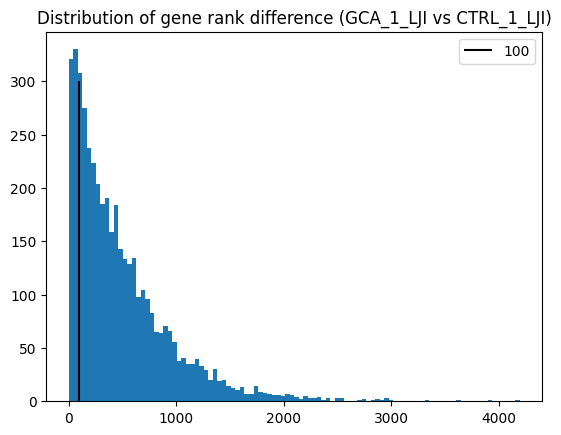

In [83]:
plt.hist(df['diff_rank'], bins = 100)
plt.vlines(x=100, ymin=0, ymax=300, color = "black", label='100')
plt.legend()
plt.title(f'Distribution of gene rank difference ({sample_CTRL} vs {sample_TEST})')
# df.sort_values(by='diff_rank')['diff_rank'].value_counts()

In [65]:
# plt.scatter(x=range(len(df)), y = df['Percent'].sort_values())
# plt.yscale('log')
# # plt.xscale('log')
# plt.hlines(y=1, xmin=0, xmax=5006)

In [ ]:
from scipy import stats
stat_ = stats.pearsonr(x=df['CTRL'], y = df['TEST'])


max_x = max(df['CTRL'])
max_y = max(df['TEST'])

plt.scatter(x=df['CTRL'], y = df['TEST'])
plt.xlabel(sample_CTRL)
plt.ylabel(sample_TEST)
plt.plot([0, max_x], [0, max_y], linestyle = 'dashed', color = 'black', alpha = 0.24)
plt.title(f'Spearson correlation : {round(stat_[0],3)}')
# plt.savefig(f'plot/correlation_scatter/{sample_CTRL}_v_{sample_TEST}_scatter_correlation.svg')